# Case Study: Employee Attrition Method - 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn import metrics

In [2]:
df_employee_detail = pd.read_excel('WA_Fn-UseC_-HR-Employee-Attrition.xlsx')

In [3]:
df_employee_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
df_employee_detail.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
sns.set_palette('Set1')

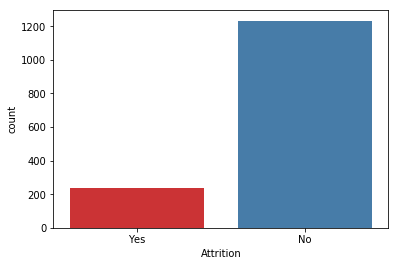

In [6]:
sns.countplot(df_employee_detail['Attrition'])

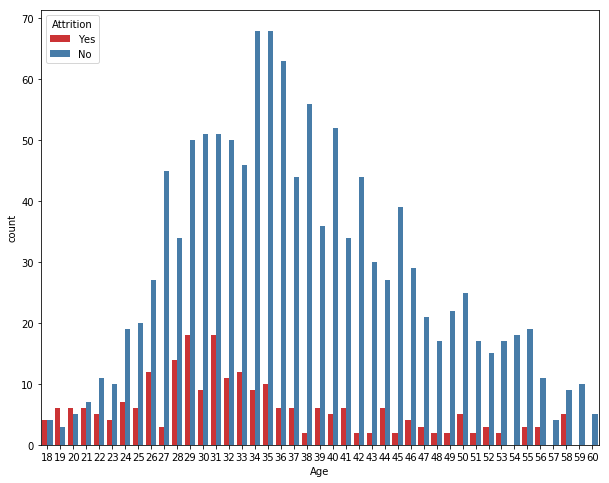

In [7]:
plt.figure(figsize=(10,8))
sns.countplot(hue='Attrition',x='Age',data=df_employee_detail)

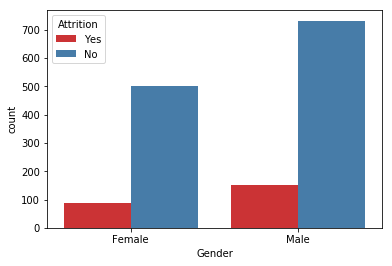

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender',hue='Attrition',data=df_employee_detail)

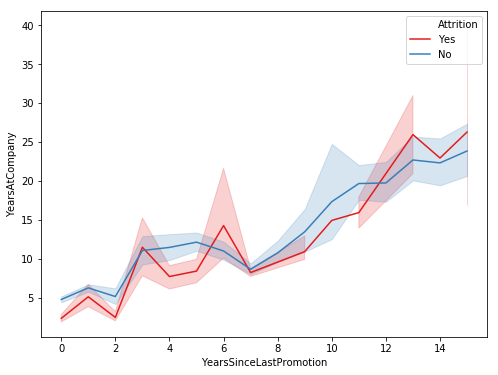

In [9]:
plt.figure(figsize=(8,6))
sns.lineplot(y=df_employee_detail['YearsAtCompany'],
             x=df_employee_detail['YearsSinceLastPromotion'],
             hue=df_employee_detail['Attrition'],);

In [10]:
X_features = ['Age','DailyRate','DistanceFromHome','HourlyRate', 'MonthlyIncome',
                'MonthlyRate','PercentSalaryHike', 'TotalWorkingYears','TrainingTimesLastYear',
                'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
                'BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender',
                'JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked',
                'OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance'
              ]

In [11]:
categorical_features = ['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender',
                'JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked',
                'OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']

In [12]:
employee_encoded_df = pd.get_dummies(data=df_employee_detail[X_features],
                                     columns=categorical_features,
                                     drop_first=True)

In [13]:
employee_encoded_df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales', 'Education_2',
       'Education_3', 'Education_4', 'Education_5',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EnvironmentSatisfaction_2',
       'EnvironmentSatisfaction_3', 'EnvironmentSatisfaction_4', 'Gender_Male',
       'JobInvolvement_2', 'JobInvolvement_3', 'JobInvolvement_4',
       'JobLevel_2', 'JobLevel_3', 'JobLevel_4', 'JobLevel_5',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing D

## Enconding 1 as Attrition Status Yes and 0 as No

In [14]:
Y = df_employee_detail.Attrition.map(lambda x: int(x=='Yes'))

In [15]:
X = sm.add_constant(employee_encoded_df)

## Splitting the dataset into train and test set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

## Applying Logistic Regression

In [18]:
logit_initial = sm.Logit(y_train,x_train).fit()

         Current function value: 0.252390
         Iterations: 35


In [19]:
logit_initial.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                     Logit                   Pseudo R-squared:        0.448     
Dependent Variable:        Attrition               AIC:                     661.4190  
Date:                      2019-11-04 22:35        BIC:                     1011.8993 
No. Observations:          1029                    Log-Likelihood:          -259.71   
Df Model:                  70                      LL-Null:                 -470.80   
Df Residuals:              958                     LLR p-value:             9.1681e-52
Converged:                 0.0000                  Scale:                   1.0000    
No. Iterations:            35.0000                                                    
--------------------------------------------------------------------------------------
                                     Coef.     Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------
const                             -329489.5414      nan     nan    nan     nan     nan
Age                                    -0.0214   0.0183 -1.1703 0.2419 -0.0573  0.0145
DailyRate                              -0.0003   0.0003 -1.0626 0.2880 -0.0009  0.0003
DistanceFromHome                        0.0553   0.0147  3.7696 0.0002  0.0266  0.0841
HourlyRate                              0.0006   0.0059  0.0997 0.9206 -0.0110  0.0122
MonthlyIncome                          -0.0002   0.0001 -1.2433 0.2137 -0.0004  0.0001
MonthlyRate                             0.0000   0.0000  1.1544 0.2483 -0.0000  0.0001
PercentSalaryHike                       0.0290   0.0506  0.5717 0.5675 -0.0703  0.1282
TotalWorkingYears                      -0.0841   0.0422 -1.9924 0.0463 -0.1668 -0.0014
TrainingTimesLastYear                  -0.1366   0.0946 -1.4427 0.1491 -0.3221  0.0490
YearsAtCompany                          0.1480   0.0590  2.5095 0.0121  0.0324  0.2635
YearsInCurrentRole                     -0.2209   0.0675 -3.2731 0.0011 -0.3532 -0.0886
YearsSinceLastPromotion                 0.1761   0.0595  2.9579 0.0031  0.0594  0.2928
YearsWithCurrManager                   -0.1573   0.0652 -2.4147 0.0157 -0.2850 -0.0296
BusinessTravel_Travel_Frequently        2.3209   0.5823  3.9857 0.0001  1.1796  3.4623
BusinessTravel_Travel_Rarely            1.4097   0.5363  2.6287 0.0086  0.3586  2.4607
Department_Research & Development  329491.2625      nan     nan    nan     nan     nan
Department_Sales                   329491.3648      nan     nan    nan     nan     nan
Education_2                             0.6138   0.4352  1.4106 0.1584 -0.2391  1.4667
Education_3                             0.6041   0.3859  1.5653 0.1175 -0.1523  1.3605
Education_4                             0.6844   0.4160  1.6450 0.1000 -0.1310  1.4997
Education_5                             0.1001   0.8151  0.1229 0.9022 -1.4974  1.6977
EducationField_Life Sciences           -2.3091   1.2162 -1.8986 0.0576 -4.6929  0.0746
EducationField_Marketing               -1.5147   1.2685 -1.1941 0.2324 -4.0008  0.9715
EducationField_Medical                 -2.0780   1.2000 -1.7316 0.0833 -4.4299  0.2740
EducationField_Other                   -1.8982   1.2670 -1.4982 0.1341 -4.3815  0.5851
EducationField_Technical Degree        -0.4916   1.2180 -0.4036 0.6865 -2.8789  1.8956
EnvironmentSatisfaction_2              -1.0623   0.3653 -2.9081 0.0036 -1.7782 -0.3463
EnvironmentSatisfaction_3              -1.1968   0.3405 -3.5146 0.0004 -1.8643 -0.5294
EnvironmentSatisfaction_4              -1.3502   0.3513 -3.8432 0.0001 -2.0388 -0.6616
Gender_Male                             0.4945   0.2458  2.0120 0.0442  0.0128  0.9763
JobInvolvement_2                       -1.4215   0.4873 -2.9167 0.0035 -2.3766 -0.4663
JobInvolvement_3                       -1.6096   0.4572 -3.5208 0.0004 -

### A function for drawing confusion matrix

In [20]:

def draw_cm(actual,predicted):
    cm = metrics.confusion_matrix(actual,predicted,[1,0])
    sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Yes','No'],yticklabels=['Yes','No'])
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.title('Confusion Matrix')
    plt.show()
    
    

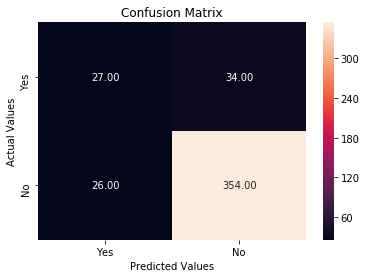

In [21]:
draw_cm(y_test,logit_initial.predict(sm.add_constant(x_test)).map(lambda x: 1 if x>=0.5 else 0))

### A function to display classification report

In [22]:
def display_classification_report(actual,predicted):
    print(metrics.classification_report(actual,predicted));
    

In [23]:
display_classification_report(y_test,logit_initial.predict(sm.add_constant(x_test)).map(lambda x: 1 if x>=0.5 else 0))

             precision    recall  f1-score   support

          0       0.91      0.93      0.92       380
          1       0.51      0.44      0.47        61

avg / total       0.86      0.86      0.86       441



### A function for drawing ROC and AUC curve

In [24]:
def draw_roc_auc_curve(actual,predicted):
    #obtain fpr,tpr,thresholds
    fpr,tpr,thresholds=metrics.roc_curve(actual,predicted,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,predicted)
    
    plt.figure(figsize=(8,6))
    
    #plot the fpr and tpr values for different thresholds
    plt.plot(fpr,tpr,label='ROC Curve (Area = %0.2f)' %auc_score)
    
    #draw a diagonal line connecting the origin and top right most point
    plt.plot([0,1],[0,1],'k--')
    
    #setting the limits on both axes
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    
    #Setting x and y labels
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.xlabel('False Positive Rate(1-Specificity)')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr,tpr,thresholds

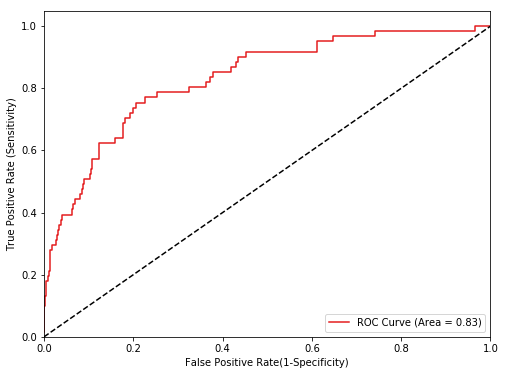

In [25]:
fpr,tpr,thresholds = draw_roc_auc_curve(y_test,logit_initial.predict(sm.add_constant(x_test)))

## Using only the significant variables for Logistic Regression

In [26]:
def get_significant_vars(model):
    var_df=pd.DataFrame(model.pvalues)
    var_df['vars']=var_df.index
    var_df.columns=['pvalue','vars']
    return list(var_df[var_df['pvalue']<= 0.05]['vars']) 
    

In [27]:
significant_vars = get_significant_vars(logit_initial)

In [28]:
logit_intermediate = sm.Logit(y_train,sm.add_constant(x_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.313308
         Iterations 8


In [29]:
logit_intermediate.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
================================================================================
Model:                   Logit                 Pseudo R-squared:      0.315     
Dependent Variable:      Attrition             AIC:                   704.7883  
Date:                    2019-11-04 22:35      BIC:                   852.8785  
No. Observations:        1029                  Log-Likelihood:        -322.39   
Df Model:                29                    LL-Null:               -470.80   
Df Residuals:            999                   LLR p-value:           3.4716e-46
Converged:               1.0000                Scale:                 1.0000    
No. Iterations:          8.0000                                                 
--------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------
const                             0.9183   0.7042  1.3041 0.1922 -0.4619  2.2985
DistanceFromHome                  0.0308   0.0122  2.5221 0.0117  0.0069  0.0547
TotalWorkingYears                -0.1350   0.0258 -5.2361 0.0000 -0.1855 -0.0844
YearsAtCompany                    0.1071   0.0451  2.3772 0.0174  0.0188  0.1954
YearsInCurrentRole               -0.1909   0.0549 -3.4769 0.0005 -0.2984 -0.0833
YearsSinceLastPromotion           0.1477   0.0488  3.0246 0.0025  0.0520  0.2434
YearsWithCurrManager             -0.0877   0.0552 -1.5898 0.1119 -0.1959  0.0204
BusinessTravel_Travel_Frequently  1.9306   0.4772  4.0454 0.0001  0.9953  2.8660
BusinessTravel_Travel_Rarely      1.1029   0.4423  2.4933 0.0127  0.2359  1.9698
EnvironmentSatisfaction_2        -0.9652   0.3130 -3.0835 0.0020 -1.5788 -0.3517
EnvironmentSatisfaction_3        -1.0649   0.2898 -3.6744 0.0002 -1.6329 -0.4968
EnvironmentSatisfaction_4        -1.2097   0.2932 -4.1258 0.0000 -1.7844 -0.6350
Gender_Male                       0.3492   0.2129  1.6404 0.1009 -0.0680  0.7663
JobInvolvement_2                 -1.0107   0.4110 -2.4594 0.0139 -1.8162 -0.2052
JobInvolvement_3                 -1.3749   0.3894 -3.5311 0.0004 -2.1381 -0.6117
JobInvolvement_4                 -2.3811   0.5612 -4.2428 0.0000 -3.4810 -1.2811
JobRole_Laboratory Technician     0.6231   0.2497  2.4950 0.0126  0.1336  1.1125
JobSatisfaction_2                -0.8192   0.3117 -2.6279 0.0086 -1.4302 -0.2082
JobSatisfaction_3                -0.7155   0.2782 -2.5716 0.0101 -1.2609 -0.1702
JobSatisfaction_4                -1.3840   0.2980 -4.6440 0.0000 -1.9682 -0.7999
NumCompaniesWorked_6              1.2486   0.4552  2.7427 0.0061  0.3563  2.1409
NumCompaniesWorked_7              1.6809   0.4404  3.8172 0.0001  0.8179  2.5440
NumCompaniesWorked_8              1.0237   0.5382  1.9020 0.0572 -0.0312  2.0785
NumCompaniesWorked_9              1.5766   0.5100  3.0916 0.0020  0.5771  2.5761
OverTime_Yes                      1.9210   0.2189  8.7743 0.0000  1.4919  2.3502
RelationshipSatisfaction_2       -0.8204   0.3161 -2.5959 0.0094 -1.4399 -0.2010
RelationshipSatisfaction_3       -0.6800   0.2849 -2.3869 0.0170 -1.2384 -0.1216
RelationshipSatisfaction_4       -0.7874   0.2933 -2.6843 0.0073 -1.3623 -0.2125
StockOptionLevel_1               -1.2119   0.2383 -5.0865 0.0000 -1.6789 -0.7449
WorkLifeBalance_3                -0.4675   0.2085 -2.2425 0.0249 -0.8761 -0.0589
================================================================================

"""

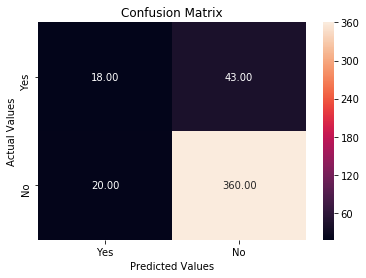

In [30]:
draw_cm(y_test,
        logit_intermediate.predict(sm.add_constant(x_test[significant_vars])).map(lambda x: 1 if x>=0.5 else 0))

In [31]:
display_classification_report(y_test,
        logit_intermediate.predict(sm.add_constant(x_test[significant_vars])).map(lambda x: 1 if x>=0.5 else 0))

             precision    recall  f1-score   support

          0       0.89      0.95      0.92       380
          1       0.47      0.30      0.36        61

avg / total       0.84      0.86      0.84       441



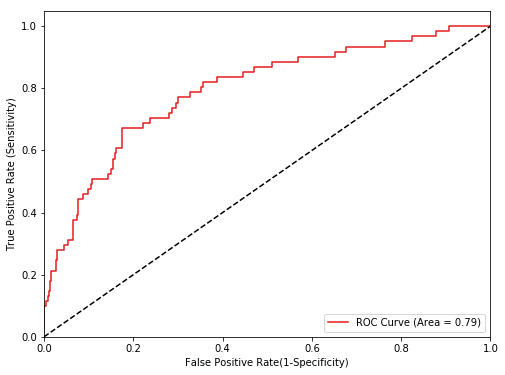

In [32]:
fpr,tpr,thresholds = draw_roc_auc_curve(y_test,
        logit_intermediate.predict(sm.add_constant(x_test[significant_vars])))

# Finding optimal classification cut off probability using Youden's index:

In [33]:
tpr_fpr = pd.DataFrame({'tpr':tpr,
                       'fpr':fpr,
                       'thresholds':thresholds})
tpr_fpr['diff']=tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values(by='diff',ascending=False)[0:5]

,tpr,fpr,thresholds,diff
106,0.672131,0.173684,0.203631,0.498447
107,0.672131,0.176316,0.196898,0.495815
108,0.672131,0.178947,0.191537,0.493184
109,0.672131,0.181579,0.190511,0.490552
110,0.672131,0.184211,0.189131,0.487921


In [34]:
y_pred_df = pd.DataFrame({'actual':y_test,
                         'predicted_probability':logit_intermediate.predict(sm.add_constant(x_test[significant_vars]))})

In [35]:
y_pred_df['predictions']= y_pred_df.predicted_probability.map((lambda x: 1 if x>=0.20 else 0))

In [36]:
y_pred_df[:6]

,actual,predicted_probability,predictions
1041,0,0.078110,0
184,0,0.044777,0
1222,1,0.220201,1
67,0,0.004584,0
220,0,0.044894,0
494,0,0.237278,1


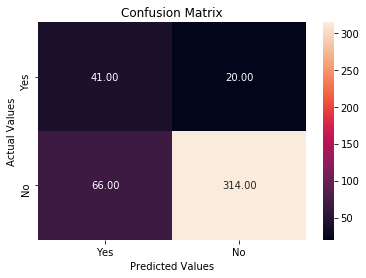

In [37]:
draw_cm(y_pred_df.actual,y_pred_df.predictions)

In [38]:
display_classification_report(y_pred_df.actual,y_pred_df.predictions)

             precision    recall  f1-score   support

          0       0.94      0.83      0.88       380
          1       0.38      0.67      0.49        61

avg / total       0.86      0.80      0.83       441



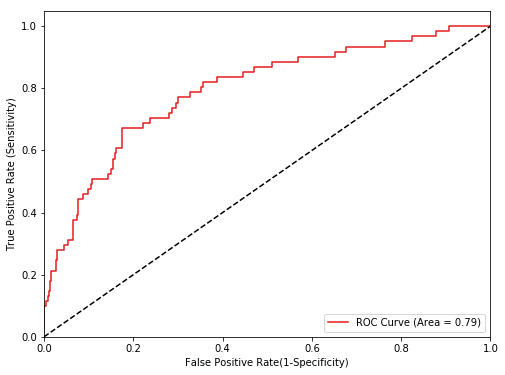

In [39]:
fpr,tpr,thresholds = draw_roc_auc_curve(y_pred_df.actual,y_pred_df.predicted_probability)

# Using Decision Tree to classify predictions:

## Continued to next module - Employee_Attrition_2
